From neurolab

In [1]:
    import pandas as pd
    import numpy as np

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Identify numerical and categorical features

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df['SibSp'].unique()
df['Parch'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
#not all int values are numerical
categorical = ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
numerical = [x for x in df.columns if x not in categorical]
numerical

['PassengerId', 'Age', 'Fare']

Identify missing values and visualize them

In [6]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
#function to calculate the percentage of missing values in each feature and plot a heatmap of missing values
import missingno as msno

def missingValPercentage(df):
    mean = df.isnull().mean().sort_values(ascending=False)
    sum = df.isnull().sum()
    rowCount = df.shape[0]
    for x in mean.index:
        if mean[x] != 0:
            print("{:.2f}".format(mean[x]*100), r"% of values missing in", x, sum[x],'/', rowCount)
    return msno.heatmap(df,figsize=(10,6))

77.10 % of values missing in Cabin 687 / 891
19.87 % of values missing in Age 177 / 891
0.22 % of values missing in Embarked 2 / 891


<AxesSubplot: >

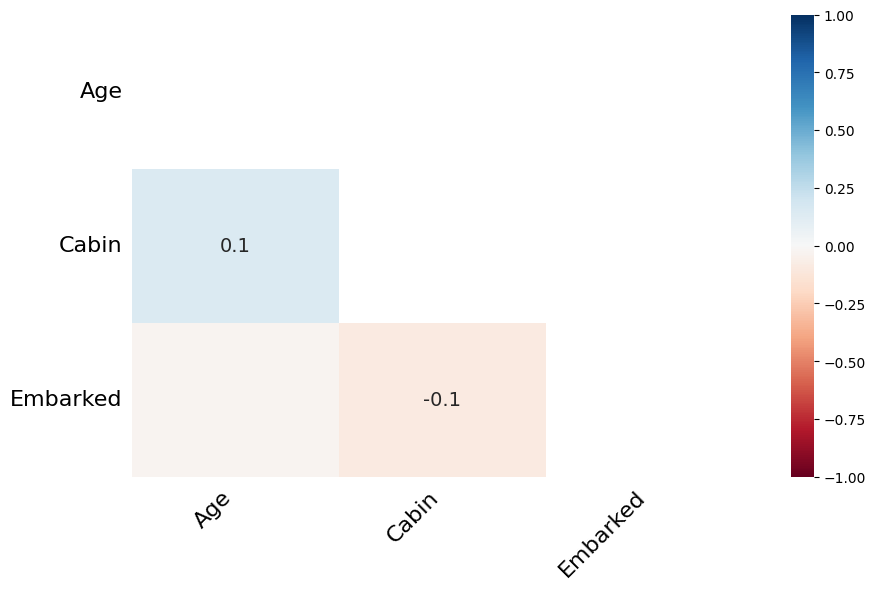

In [8]:
missingValPercentage(df)

Identifying the outliers

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

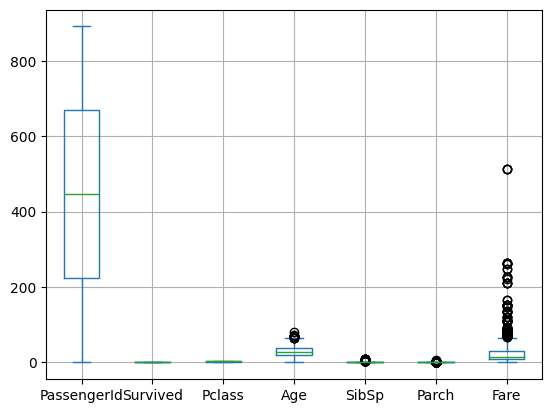

In [11]:
df.plot.box(grid=True)

<AxesSubplot: xlabel='Embarked', ylabel='Age'>

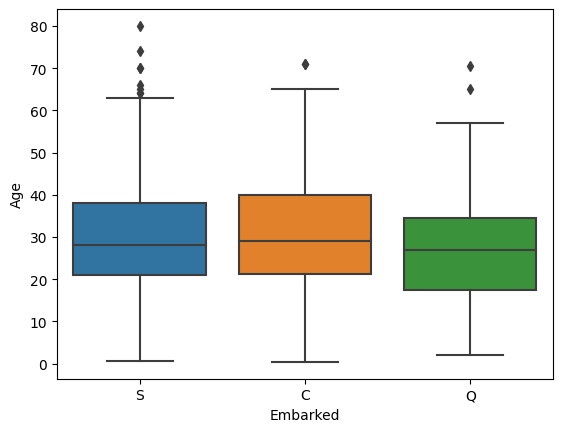

In [12]:
import seaborn as sns

sns.boxplot(x='Embarked', y='Age', data=df)

Handling the missing values of numerical features

In [13]:
#let us look into the numerical feature with the highest number of missingvalue i.e., Age
#we will try to fill the NaN values with mean, median and mode and select the best way of imputation

import matplotlib.pyplot as plt
%matplotlib inline
#function to visualize the distribution (kde) of original feature vs feature imputed in various ways
def kdePlot(*arguments):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for feature in arguments:
        df[feature].plot(kind='kde', ax=ax)
        #df[imputed_feature].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')


29.69911764705882

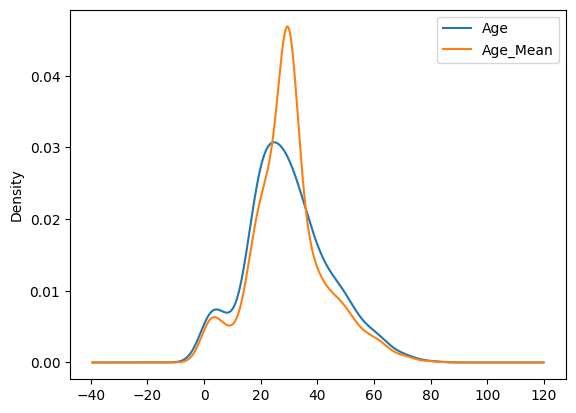

In [14]:

#mean imputation
df['Age_Mean'] = df['Age'].fillna(df['Age'].mean())
kdePlot('Age','Age_Mean')
df['Age'].mean()

24.0

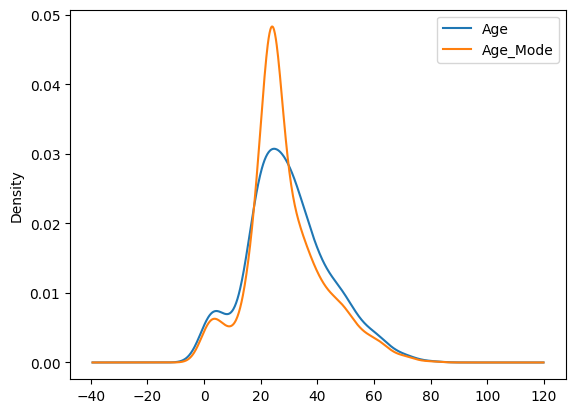

In [15]:
#mode imputation
df['Age_Mode'] = df['Age'].fillna(df['Age'].mode()[0])
kdePlot('Age','Age_Mode')
df['Age'].mode()[0]

28.0

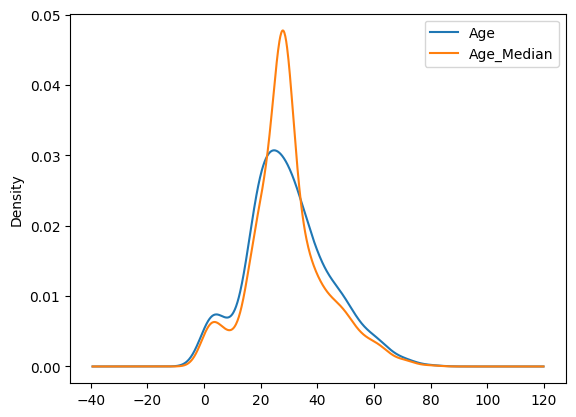

In [16]:
#median imputation
df['Age_Median'] = df['Age'].fillna(df['Age'].median())
kdePlot('Age','Age_Median')
df['Age'].median()

In [17]:
#random sample imputation
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Mean         0
Age_Mode         0
Age_Median       0
dtype: int64

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_random"]=df[variable]
    print(df['Age_random'])
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [19]:
impute_nan(df, 'Age', df['Age'].mean())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age_random, Length: 891, dtype: float64


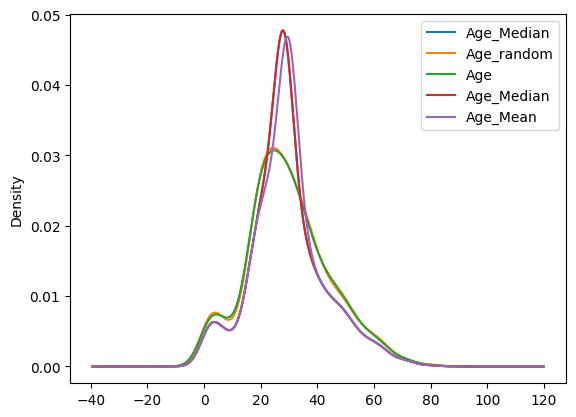

In [20]:
kdePlot('Age_Median', 'Age_random', 'Age', 'Age_Median', 'Age_Mean')

In [21]:
#Capturing NAN values with a new feature

df['Age_New_Feature'] = np.where(df['Age'].isnull(),1,0)

In [22]:
df['Age_New_Feature'].sum()#sum is equal to number of NaN values as NaN is now 1 and non NaN is 0

177

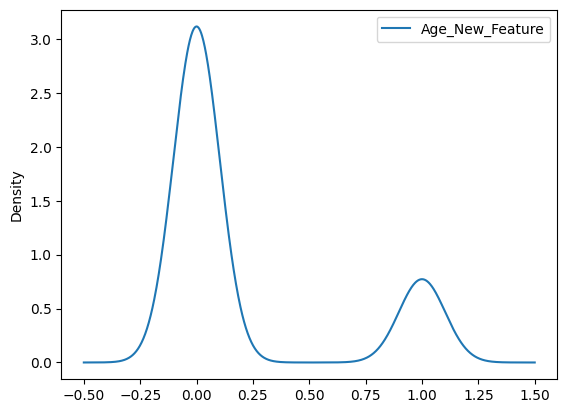

In [23]:
kdePlot('Age_New_Feature')

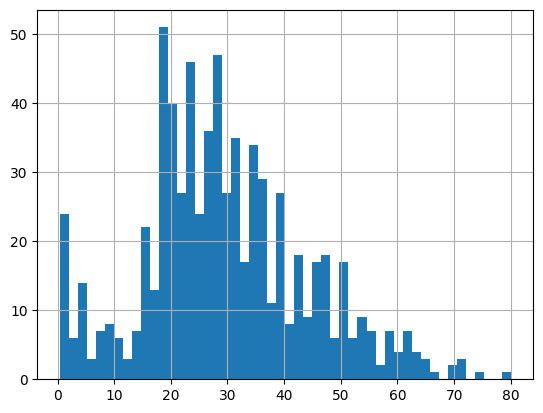

In [24]:
#End of Distribution imputation

df['Age'].hist(bins=50)
extreme_value = df['Age'].mean()+3*df['Age'].std()
df['Age_EndOf_Distribution'] = df['Age'].fillna(extreme_value)

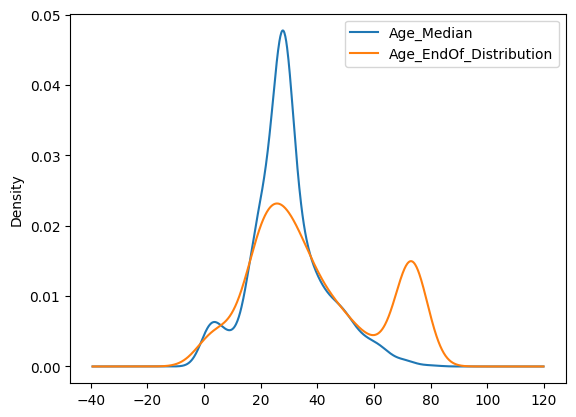

In [25]:
kdePlot('Age_Median', 'Age_EndOf_Distribution')

In [26]:
#w.r.t. end of disrtibution imputation, lets compare the outliers before and after imputation
#sns.boxplot('Age', data=df).set_title("Before Imputation")

In [27]:
sns.boxplot('Age_EndOf_Distribution', data=df).set_title("After End of Distribution Imputation")

TypeError: boxplot() got multiple values for argument 'data'

In [ ]:
#Arbitrary Value Imputation
#lets take an arbitrary value of 90

df['Age_Arbitrary'] = df['Age'].fillna(90)

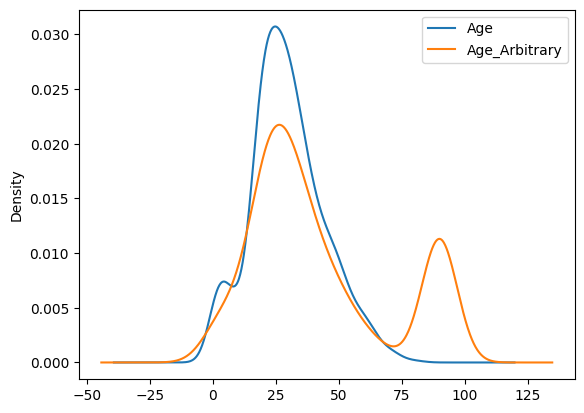

In [ ]:
kdePlot('Age', 'Age_Arbitrary')

In [ ]:
#w.r.t. arbitrary value imputation, lets compare the outliers before and after imputation

sns.boxplot('Age', data=df).set_title("Before Imputation")

TypeError: boxplot() got multiple values for argument 'data'

In [ ]:
sns.boxplot('Age_Arbitrary', data=df).set_title("After Arbitrary Value Imputation")

TypeError: boxplot() got multiple values for argument 'data'

In [ ]:
#from above plots - though the outliers are treated, the distribution after imputation is not a perfect gaussian distribution

Handling the missing values of categorical features

In [ ]:
#frequent value imputation
#lets take the categorical feature - Embarked

df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#lets find the most frequestly occuring cabin class and use it to fill the NaN values
def freqValue(df,feature):
    print("\"",df[feature].value_counts().index[0], "\"", "is the most frequent value in {} column with".format(feature), df[feature].value_counts()[0], "occurences")

In [ ]:
freqValue(df, 'Embarked')

" S " is the most frequent value in Embarked column with 644 occurences


In [ ]:
#lets capture the importance or the info of the NaN values in cabin feature in a new feature - Embarked_NaN
#it will help us to analyse if there is a correlation between missing of these values with any other feature even after we replace the NaN values

def captureNaN(df, feature):
    df[feature+"_NaN"] = np.where(df[feature].isnull(), 1, 0)

captureNaN(df,'Embarked')

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
df['Embarked'].isnull().sum()


0

In [ ]:
#Replacing NAN with a new category
#Suppose if we have more frequent categories, we just replace NAN with a new category (e.g.: replace NaN with 'Missing')
#lets apply this on Cabin as it has 77% of missing values
#creating a new feature Cabin_Class using the cabin category makes more sense than the cabin number

df['Cabin_Class'] = df['Cabin'].str[0]
df.Cabin_Class.unique()

df['Cabin_Class'].fillna('Missing', inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Age_Mean,Age_Mode,Age_Median,Age_random,Age_New_Feature,Age_EndOf_Distribution,Age_Arbitrary,Embarked_NaN,Cabin_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,22.0,22.0,22.0,22.0,0,22.0,22.0,0,Missing
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,38.0,38.0,38.0,38.0,0,38.0,38.0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,26.0,26.0,26.0,26.0,0,26.0,26.0,0,Missing
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,35.0,35.0,35.0,35.0,0,35.0,35.0,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,35.0,35.0,35.0,35.0,0,35.0,35.0,0,Missing


In [ ]:
df.isnull().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                       177
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    0
Age_Mean                    0
Age_Mode                    0
Age_Median                  0
Age_random                  0
Age_New_Feature             0
Age_EndOf_Distribution      0
Age_Arbitrary               0
Embarked_NaN                0
Cabin_Class                 0
dtype: int64